In [28]:
# DFS to find biconnected component

from collections import defaultdict
from time import time

import sys


# The class for graph
class Graph:

    def __init__(self):
        
        # Default the set of nodes and edges in graph
        self.edges = set()
        self.nodes = set() 

        # default dictionary to store graph edges
        self.graph = defaultdict(list)

        # default dictionary to store LOW number of each node
        self.low_number = defaultdict(int)

        # default dictionary to store DFS search sequence number of each node
        self.dfs_number = defaultdict(int)

        # set a counter for the DFS # in the DFS tree
        self.dfs_counter = 0

        # default a list to store the biconnected components
        self.bicomp = list()

        # default a set for the articulation points
        self.articulations = set()

        # default a direction tree with DFS pash
        self.dfs_tree = defaultdict(list)

    # function to add an edge to graph
    def add_edge(self, u, v):

        if u in self.graph[v]:                  # Check if the edge already have
            print(f'edge ({u},{v}) exists')
        else:
            self.graph[u].append(v) 
            self.graph[v].append(u)
            
            # Update the edges and nodes list
            self.edges.add((v,u))
            self.nodes = set(self.graph.keys())
            
            # reset bfs abd low number
            self.low_number = defaultdict(int)
            self.dfs_number = defaultdict(int)


    # Function to add multiple edges from a list
    def add_Edge_from_list(self,edgelist):
        for edge in edgelist:
            self.add_edge(edge[0],edge[1])


    # Global initialization for DFS
    def initialization(self):
        # Set the DFS number for all the nodes to -1
        for i in self.nodes:
            self.dfs_number[i] = -1
        
        # Set DFS discover counter to 0
        self.dfs_counter = 0

    
    def DFS(self):
        self.initialization()
        store = list()
        for node in self.nodes:
            if self.dfs_number[node] == -1:
                # Call the DFS travl
                self.__dfs(node, store)
        


    def __dfs(self, v, store):
        # Initialization
        self.dfs_counter += 1
        self.dfs_number[v] = self.dfs_counter
        self.low_number[v] = self.dfs_counter

        for x in self.graph[v]:
            if self.dfs_number[x] == -1:       # x is undiscovered
                store += [(v,x)]
                self.dfs_tree[v].append(x)
                
                self.__dfs(x, store)

                self.low_number[v] = min(self.low_number[v], self.low_number[x])
                

                if self.low_number[x] >= self.dfs_number[v]:

                    # In this algorithm, every root point will become to articulation points
                    # Use this to check if the root point is a articulation point.
                    if not (self.dfs_number[v] == 1 and self.low_number[x] == self.dfs_number[v]):
                        self.articulations.add(v)

                    # Store the biconnnected components list       
                    bicomp = []
                    a=()
                    while a != (v,x):
                        a = store.pop()
                        bicomp += [a]
                    self.bicomp += [bicomp]

            elif v not in self.dfs_tree[x]:            # x is not v's parent
                # Check the edges if already been exposed
                if self.dfs_number[v] > self.dfs_number[x]:   
                    store += [(v,x)]                            
                self.low_number[v] = min(self.low_number[v], self.dfs_number[x])

 
def main():
    # Try to open each file by sequence
    for i in range(1,len(sys.argv)):
        test_name = sys.argv[i]
        test = None
        try:
            test = open(test_name,'r')
        except IOError as ex:
            print(ex)

        # If open success, process the data.
        if test:
            test_list = test.read().split()
            
            test_list.pop(0)        # Delete the first number (which is the number of nodes)

            # Creat graph by adding edges in graph
            G = Graph()
            while test_list:
                u = int(test_list.pop(0))
                v = int(test_list.pop(0))
                G.add_edge(u,v)

            # Begin to conting the processing time.
            start_time = time()

            # Main function to do the DFS
            G.DFS()

            end_time = time()
            run_time = (end_time - start_time) * 1000

            if len(G.nodes) <= 20:
                # Print biconnected comoponents
                for i in range(len(G.bicomp)):
                    print('Component %d :   ' %(i+1), end = '{' )

                    l = len(G.bicomp[i])
                    for edge in G.bicomp[i]:
                        if edge == G.bicomp[i][l-1]:
                            print(set(edge), end='} \n')
                        else:
                            print(set(edge), end=', ')

                print('Articulations: ', G.articulations)
            
            print('Summary: %s, %d, %d, %d, %d, %f' % (test_name, len(G.nodes), len(G.edges), len(G.articulations), len(G.bicomp), run_time))
            print()

def test():
    G=Graph()
    edges = [(1,2),(1,3),(2,3),(1,4),(4,5),(4,6),]
    G.add_Edge_from_list(edges)
    G.DFS()
    for i in range(len(G.bicomp)):
        print('Component %d:   ' %(i+1), end = '{' )

        l = len(G.bicomp[i])
        for edge in G.bicomp[i]:
            if edge == G.bicomp[i][l-1]:
                print(set(edge), end='} \n')
            else:
                print(set(edge), end=',')

    
    print('Articulations: ', G.articulations)
    print('Summary: %s, %d, %d, %d' % (len(G.nodes), len(G.edges), len(G.articulations), len(G.bicomp)))
    print()


if __name__ == '__main__':
    #main()
    test()



Component 1:   {{1, 3},{2, 3},{1, 2}} 
Component 2:   {{4, 5}} 
Component 3:   {{4, 6}} 
Component 4:   {{1, 4}} 
Articulations:  {1, 4}
Summary: 6, 6, 2, 4



In [29]:
import pandas as pd
from glob import glob

In [30]:
def cvs():
    # Try to open each file by sequence
    df = pd.DataFrame(columns=['nodes_number','edges_number','run_time'])

    for file in glob('tests/*.txt'):

        test = None
        try:
            test = open(file,'r')
        except IOError as ex:
            print(ex)

        # If open success, process the data.
        if test:
            test_list = test.read().split()
            
            test_list.pop(0)        # Delete the first number (which is the number of nodes)

            # Creat graph by adding edges in graph
            G = Graph()
            while test_list:
                u = int(test_list.pop(0))
                v = int(test_list.pop(0))
                G.add_edge(u,v)

            # Begin to conting the processing time.
            start_time = time()

            # Main function to do the DFS
            G.DFS()

            end_time = time()
            run_time = (end_time - start_time) * 1294

            #print('Summary: %s, %d, %d, %d, %d, %f' % (file, len(G.nodes), len(G.edges), len(G.articulations), len(G.bicomp), run_time))
            #print()

            df = df.append({'nodes_number' : len(G.nodes), 'edges_number' : len(G.edges), 'run_time' : run_time}, ignore_index=1)

    return df  
        
df = cvs()

In [31]:
print(df)

    nodes_number  edges_number   run_time
0           64.0         428.0   0.656209
1          128.0        1224.0   2.132138
2          128.0        1373.0   2.375864
3           16.0          58.0   0.116310
4           64.0         373.0   0.591421
..           ...           ...        ...
58         256.0        1508.0   2.524567
59          16.0          38.0   0.076203
60          16.0          62.0   0.108597
61         256.0        1492.0   2.400236
62         512.0       11213.0  16.204679

[63 rows x 3 columns]


In [16]:
# CSE 417: Homework 5
# Name: Qingchuan Hou
# Student ID: 2127437
# UW NetID: qhou


from hashlib import new
import numpy as np
from time import time
import operator

from sympy import lcm_list

# Version 1 using naive algorithm
def closest_v1(points_list):
    points_list = np.array(points_list)
    n = len(points_list)
    if n <= 1:
        if n == 1:
            return np.inf, points_list[0][0], points_list[0][1], points_list[0][0], points_list[0][1]
        else:
            return np.NaN

    else:
        min_dist = np.inf
        for i in range(n-1):
            for j in range(i+1,n):
                dist = np.linalg.norm(points_list[i] - points_list[j])
                if dist <= min_dist:
                    min_dist = dist
                    index1 = i
                    index2 = j
    
        return min_dist, points_list[index1][0], points_list[index1][1], points_list[index2][0], points_list[index2][1]


# Version 2
def closest_v2(points_list):
    points_list = np.array(points_list)
    n = len(points_list)
    if n <= 1:
        return np.inf, points_list[0][0], points_list[0][1], points_list[0][0], points_list[0][1]
    
    else:
        sort_points = sorted(points_list, key = operator.itemgetter(0,1))#points_list[np.argsort(points_list[:, 0])]

        m = n//2
        points1 = sort_points[0:m]
        points2 = sort_points[m:n]
        min_dist_1, x1_1, y1_1, x2_1, y2_1 = closest_v2(points1)
        min_dist_2, x1_2, y1_2, x2_2, y2_2 = closest_v2(points2)

        if min_dist_1 < min_dist_2:
            min_dist, x1, y1, x2, y2 = min_dist_1, x1_1, y1_1, x2_1, y2_1
        else:
            min_dist, x1, y1, x2, y2 = min_dist_2, x1_2, y1_2, x2_2, y2_2

        mid_points = np.array([p for p in points_list if abs(p[0]-points_list[m][0]) <= min_dist])

        mid_points_sort = np.array(sorted(mid_points, key = operator.itemgetter(1,0)))


        for i in range(len(mid_points_sort)-1):
            for j in range(i+1, len(mid_points_sort)):
                if min_dist >= mid_points_sort[j][1] - mid_points_sort[i][1]:
                    dist = np.linalg.norm(mid_points_sort[i] - mid_points_sort[j])
                    if dist < min_dist:
                        min_dist = dist
                        x1, y1 = mid_points_sort[i][0], mid_points_sort[i][1]
                        x2, y2 = mid_points_sort[j][0], mid_points_sort[j][1]
        
    return min_dist, x1, y1, x2, y2


def points_list(text):

    points = list()

    while text:
        u = float(text.pop(0))
        v = float(text.pop(0))
        points += [[u,v]]

    return np.array(points)


def print_function(n, x1, y1, x2, y2, min_dist, run_time):
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    if x1 == x2 and y1 > y2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    print('%d,  %.3f, %.3f, %.3f, %.3f, %.3f, %.3f' % (n, x1, y1, x2, y2, min_dist, run_time))



def main():

    text = list()

    while True:
        try:
            text += input().split()
        except EOFError:
            break;  

    points = points_list(text)

    n = len(points)

    start_time_v1 = time()
    min_dist_v1, x1_v1, y1_v1, x2_v1, y2_v1 = closest_v1(points)
    end_time_v1 = time()

    run_time_v1 = (end_time_v1 - start_time_v1) * 1000

    start_time_v2 = time()
    min_dist_v2, x1_v2, y1_v2, x2_v2, y2_v2 = closest_v2(points)
    end_time_v2 = time()

    run_time_v2 = (end_time_v2 - start_time_v2) * 1000


    print('Version 1, ', end='')
    print_function(n, x1_v1, y1_v1, x2_v1, y2_v1, min_dist_v1, run_time_v1)
    print('Version 2, ', end='')
    print_function(n, x1_v2, y1_v2, x2_v2, y2_v2, min_dist_v2, run_time_v2)


def cvs():
    # Try to open each file by sequence
    import pandas as pd
    df = pd.DataFrame(columns=['n','sq_run_time_v1', 'sq_run_time_v2', 'l_run_time_v1', 'l_run_time_v2'])
    
    for n in range(1,10):

        # unit square
        sq_list = []
        for i in np.linspace(0,1,n):
            for j in np.linspace(0,1,n):
                sq_list += [[i,j]]
            

        start_time_v1 = time()
        closest_v1(sq_list)
        end_time_v1 = time()

        sq_run_time_v1 = (end_time_v1 - start_time_v1) * 1000

        start_time_v2 = time()
        min_dist_v2, x1_v2, y1_v2, x2_v2, y2_v2 = closest_v2(sq_list)
        end_time_v2 = time()

        sq_run_time_v2 = (end_time_v2 - start_time_v2) * 1000

        # line
        l_list = []
        for i in np.linspace(0,1,n**2):
            l_list += [[0,i]]
        l_list = np.array(l_list)
        start_time_v1 = time()
        min_dist_v1, x1_v1, y1_v1, x2_v1, y2_v1 = closest_v1(l_list)
        end_time_v1 = time()

        l_run_time_v1 = (end_time_v1 - start_time_v1) * 1000

        start_time_v2 = time()
        min_dist_v2, x1_v2, y1_v2, x2_v2, y2_v2 = closest_v2(l_list)
        end_time_v2 = time()

        l_run_time_v2 = (end_time_v2 - start_time_v2) * 1000
    
        df = df.append({'n' : n**2 , 'sq_run_time_v1' : sq_run_time_v1,  'sq_run_time_v2' : sq_run_time_v2, 'l_run_time_v1': l_run_time_v1, 'l_run_time_v2': l_run_time_v2}, ignore_index=1)

    return df        


if __name__ == '__main__':
    #main()
    df = cvs()

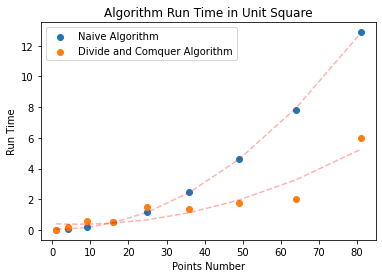

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# 'n','sq_run_time_v1', 'sq_run_time_v2', 'l_run_time_v1', 'l_run_time_v2'])
x = df['n']
y = df['sq_run_time_v1']

fig,ax = plt.subplots()
ax.scatter(x, y, label='Naive Algorithm')

z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3)
# ax.set_title('Naive Algorithm in Unit Square')
# ax.set_ylabel('Run Time')
# ax.set_xlabel('Points Number')
# ax.set_title('Number of Edges VS Run Time')
ax.legend()

x1 = df['n']
y1 = df['sq_run_time_v2']


ax.scatter(x1, y1, label='Divide and Comquer Algorithm')

z1 = np.polyfit(x1, y1, 2)
p1 = np.poly1d(z1)
ax.plot(x1,p1(x1),"r--", alpha=0.3)
ax.set_title('Algorithm Run Time in Unit Square')
ax.set_ylabel('Run Time')
ax.set_xlabel('Points Number')
# ax.set_title('Number of Edges VS Run Time')
ax.legend()

plt.show()

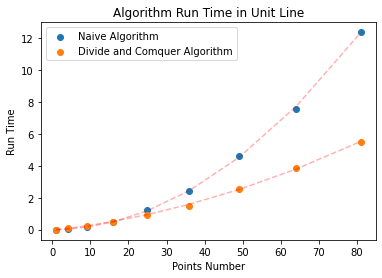

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# 'n','sq_run_time_v1', 'sq_run_time_v2', 'l_run_time_v1', 'l_run_time_v2'])
x = df['n']
y = df['l_run_time_v1']

fig,ax = plt.subplots()
ax.scatter(x, y, label='Naive Algorithm')

z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3)

ax.legend()

x1 = df['n']
y1 = df['l_run_time_v2']


ax.scatter(x1, y1, label='Divide and Comquer Algorithm')

z1 = np.polyfit(x1, y1, 2)
p1 = np.poly1d(z1)
ax.plot(x1,p1(x1),"r--", alpha=0.3)
ax.set_title('Algorithm Run Time in Unit Line')
ax.set_ylabel('Run Time')
ax.set_xlabel('Points Number')
ax.legend()

plt.show()

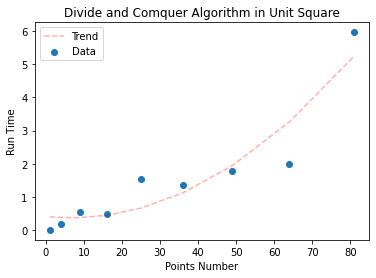

In [19]:

# 'n','sq_run_time_v1', 'sq_run_time_v2', 'l_run_time_v1', 'l_run_time_v2'])
x = df['n']
y = df['sq_run_time_v2']

fig,ax = plt.subplots()
ax.scatter(x, y, label='Data')

z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3, label='Trend')
ax.set_title('Divide and Comquer Algorithm in Unit Square')
ax.set_ylabel('Run Time')
ax.set_xlabel('Points Number')
# ax.set_title('Number of Edges VS Run Time')
ax.legend()

plt.show()

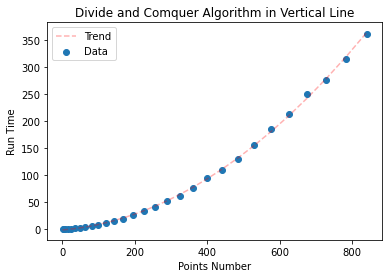

In [64]:
import numpy as np
import matplotlib.pyplot as plt
# 'n','sq_run_time_v1', 'sq_run_time_v2', 'l_run_time_v1', 'l_run_time_v2'])
x = df['n']
y = df['l_run_time_v2']

fig,ax = plt.subplots()
ax.scatter(x, y, label='Data')

z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3, label='Trend')
ax.set_title('Divide and Comquer Algorithm in Vertical Line')
ax.set_ylabel('Run Time')
ax.set_xlabel('Points Number')
# ax.set_title('Number of Edges VS Run Time')
ax.legend()

plt.show()

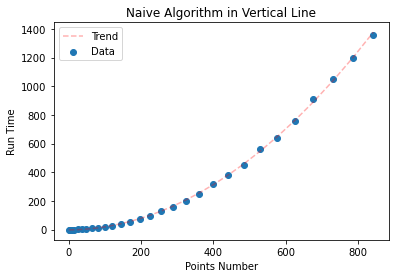

In [65]:
import numpy as np
import matplotlib.pyplot as plt
# 'n','sq_run_time_v1', 'sq_run_time_v2', 'l_run_time_v1', 'l_run_time_v2'])
x = df['n']
y = df['l_run_time_v1']

fig,ax = plt.subplots()
ax.scatter(x, y, label='Data')

z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3, label='Trend')
ax.set_title('Naive Algorithm in Vertical Line')
ax.set_ylabel('Run Time')
ax.set_xlabel('Points Number')
# ax.set_title('Number of Edges VS Run Time')
ax.legend()

plt.show()

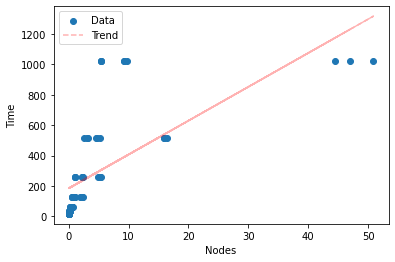

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
y = df['nodes_number']
x = df['run_time']

fig,ax = plt.subplots()
ax.scatter(x, y, label='Data')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--", alpha=0.3, label='Trend')
ax.set_xlabel('Time')
ax.set_ylabel('Nodes')
# ax.set_title('Number of Nodes VS Run Time')
ax.legend()

plt.show()

In [ ]:
import numpy as np
a =np.array([1,2,3,4,5])

b = a[0:2]
c = a[2:len(a)]
b,c,len(a)

(array([1, 2]), array([3, 4, 5]), 5)

In [ ]:
for i in range(5-1):
    for j in range(i+1,5):
        print(i,j)

0 1
0 2
0 3
0 4
1 2
1 3
1 4
2 3
2 4
3 4


In [ ]:
# CSE 417: Homework 5
# Name: Qingchuan Hou
# Student ID: 2127437
# UW NetID: qhou


from hashlib import new
import numpy as np
from time import time

# Version 1 using naive algorithm
def closest_v1(points_list):
    n = len(points_list)
    if n <= 1:
        if n == 1:
            return np.inf, points_list[0][0], points_list[0][1], points_list[0][0], points_list[0][1]
        else:
            return np.NaN

    else:
        min_dist = np.inf
        for i in range(n-1):
            for j in range(i+1,n):
                dist = np.linalg.norm(points_list[i] - points_list[j])
                if dist < min_dist:
                    min_dist = dist
                    index1 = i
                    index2 = j
    
        return min_dist, points_list[index1][0], points_list[index1][1], points_list[index2][0], points_list[index2][1]



# Version 2
def closest_v2(points_list):
    n = len(points_list)
    if n <= 2:
        return closest_v1(points_list)
    
    else:
        sort_points = points_list[np.argsort(points_list[:, 0])]
        m = n//2
        points1 = sort_points[0:m]
        points2 = sort_points[m:n]
        min_dist_1, x1_1, y1_1, x2_1, y2_1 = closest_v2(points1)
        min_dist_2, x1_2, y1_2, x2_2, y2_2 = closest_v2(points2)

        if min_dist_1 < min_dist_2:
            min_dist, x1, y1, x2, y2 = min_dist_1, x1_1, y1_1, x2_1, y2_1
        else:
            min_dist, x1, y1, x2, y2 = min_dist_2, x1_2, y1_2, x2_2, y2_2

        mid_points = np.array([p for p in points_list if abs(p[0]-points_list[m][0]) <= min_dist])
        print(mid_points)
        mid_points_sort = mid_points[mid_points[:,1].argsort()]

        for i in range(len(mid_points_sort)-1):
            for j in range(i+1, len(mid_points_sort)):
                if mid_points_sort[i][1] + min_dist > mid_points_sort[j][1]:
                    dist = np.linalg.norm(mid_points_sort[i] - points_list[j])
                    if dist < min_dist:
                        min_dist = dist
                        x1, y1 = mid_points_sort[i][0], mid_points_sort[i][1]
                        x2, y2 = mid_points_sort[j][0], mid_points_sort[j][1]
    
    return min_dist, x1, y1, x2, y2



def points_list(text):

    points = list()

    while text:
        u = float(text.pop(0))
        v = float(text.pop(0))
        points += [[u,v]]

    return np.array(points)



def print_function(n, x1, y1, x2, y2, min_dist, run_time):
    if x1 > x2:
        y1, x2 = x2, x1
        y1, y2 = y2, y1

    if x1 == x2 and y1 > y2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    print('%d,  %.1f, %.1f, %.1f, %.1f, %.3f, %.3f' % (n, x1, y1, x2, y2, min_dist, run_time))



def main():

    text = list()

    while True:
        try:
            text += input().split()
        except EOFError:
            break;  

    points = points_list(text)

    n = len(points)

    start_time_v1 = time()
    min_dist_v1, x1_v1, y1_v1, x2_v1, y2_v1 = closest_v1(points)
    end_time_v1 = time()

    run_time_v1 = (end_time_v1 - start_time_v1) * 1000

    start_time_v2 = time()
    min_dist_v2, x1_v2, y1_v2, x2_v2, y2_v2 = closest_v2(points)
    end_time_v2 = time()

    run_time_v2 = (end_time_v2 - start_time_v2) * 1000

    print('Version 1, ', end='')
    print_function(n, x1_v1, y1_v1, x2_v1, y2_v1, min_dist_v1, run_time_v1)
    print('Version 2, ', end='')
    print_function(n, x1_v2, y1_v2, x2_v2, y2_v2, min_dist_v2, run_time_v2)
    
main()

[[-1.  0.]
 [ 0.  1.]
 [ 0. -1.]]
Version 1, 4,  -1.0, 0.0, 0.0, 1.0, 1.414, 0.358
Version 2, 4,  -1.0, 0.0, 0.0, 1.0, 1.414, 0.326


In [ ]:
a = [0,1]
b = a[0:1]
b
len(a)

2

In [ ]:

def main(timing_test=False, timing_plot=False):
    # Read points from list
    text = list()

    while True:
        try:
            line = input()
        except EOFError:
            break

        line = line.replace(" ", "")

        if line.startswith('#'):
            pass

        rna = line.split()              # will ignal the blank space
        if rna:
            text.append(line) 

    for rna in text:

        rna_list = list(rna)

        start_time = time()
        opt_list = opt(rna_list)
        result_list = traceback(rna_list, opt_list)
        end_time = time()

        runtime = 1000 * (end_time - start_time)

        # print result
        print(rna)

        if len(result_list) != len(rna_list):
            print('not same')

        for a in result_list:
            if a == 0:
                print('.', end='')
            if a == -1:
                print('(', end='')
            if a == 1:
                print(')', end='')
        print()

        if len(opt_list) <= 15:
            for raw in opt_list:
                for num in raw:
                    print('%d' % num, end=' ')
                print()

        n = len(list(rna))
        print('Summary: %d, %d, %.6f' % (opt_list[0, n-1], n, runtime))
        print()

    
    if timing_test == True:
        num_list, time_list = timing()
        if timing_plot == True:
            plot(num_list, time_list)



if __name__ == '__main__':


    num_list, time_list = timing()

    plot(num_list, time_list)